# Libraries 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading image

In [2]:
img=cv2.imread('test.jpg')

In [3]:
type(img)

numpy.ndarray

In [4]:
img.shape

(375, 500, 3)

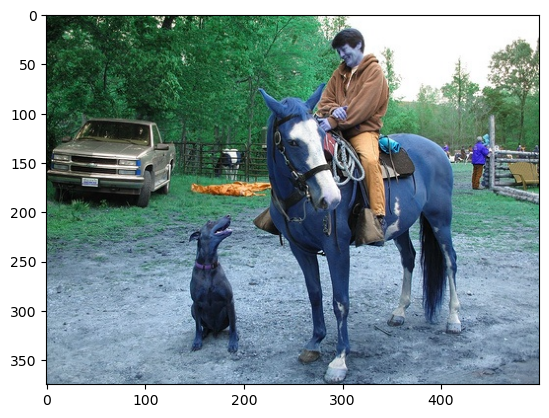

In [5]:
plt.imshow(img)
plt.show()

# Color conversion

In [7]:
img_RGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

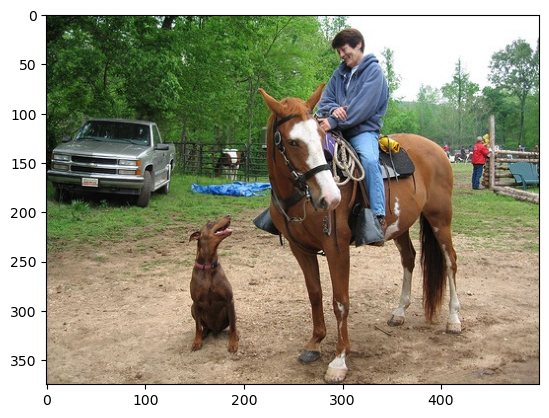

In [8]:
plt.imshow(img_RGB)

# Resizing Image

In [34]:
img_size=cv2.resize(img_RGB,dsize=(416,416))

In [35]:
img_size.shape

(416, 416, 3)

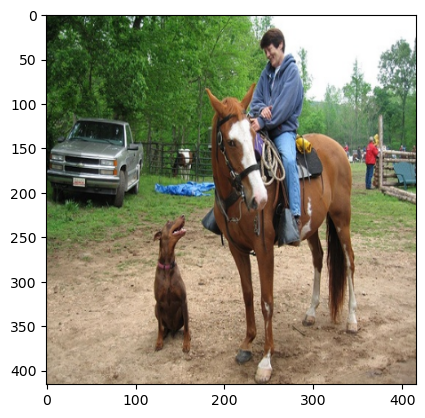

In [36]:
plt.imshow(img_size)
plt.show()

# Image Processing

In [12]:
# helper function to display gray images
def imshow(img):
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='gray')
    plt.show()

## method 1: blurring

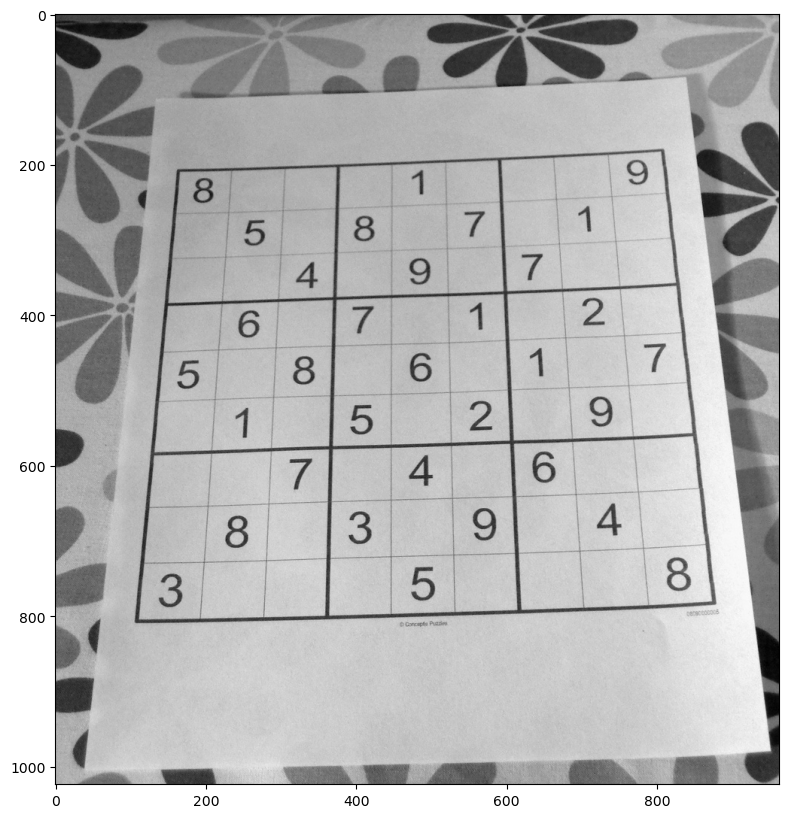

In [18]:
img = cv2.imread('sudoku.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

imshow(img_gray)

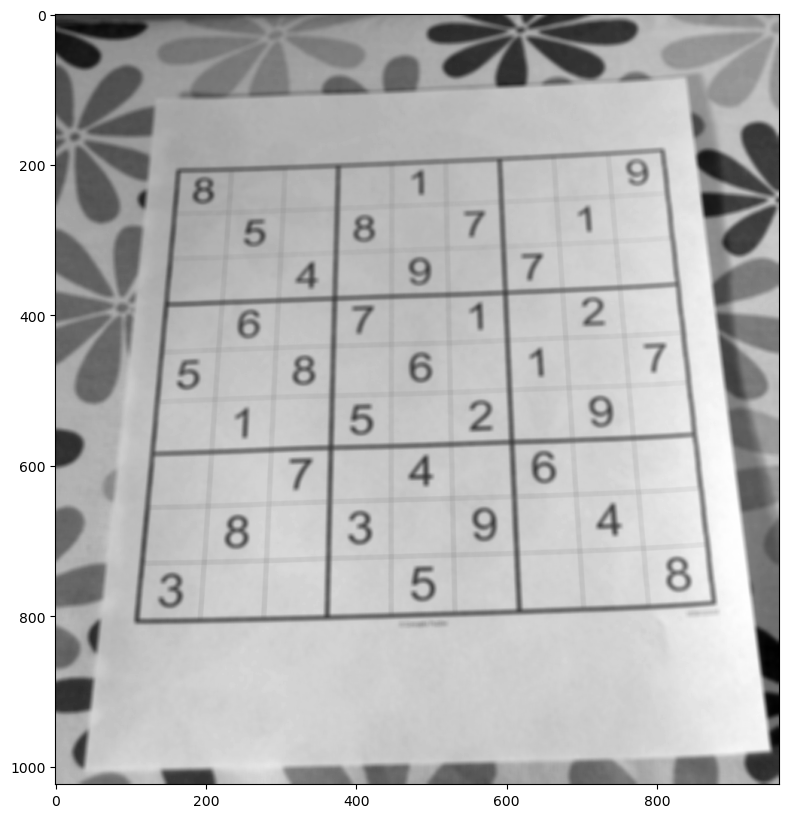

In [16]:
# blurring image to reduce noise
# try to comment this line and see the difference
# also try to change ksize
img_gray = cv2.blur(img_gray, ksize=(7,7)) 

imshow(img_gray)

## method 2: Canny

Canny does use two thresholds (upper and lower):
- If a pixel gradient is higher than the upper threshold, the pixel is accepted as an edge
- If a pixel gradient value is below the lower threshold, then it is rejected.
- If the pixel gradient is between the two thresholds, then it will be accepted only if it is connected to a pixel that is above the upper threshold.

Source: https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html 

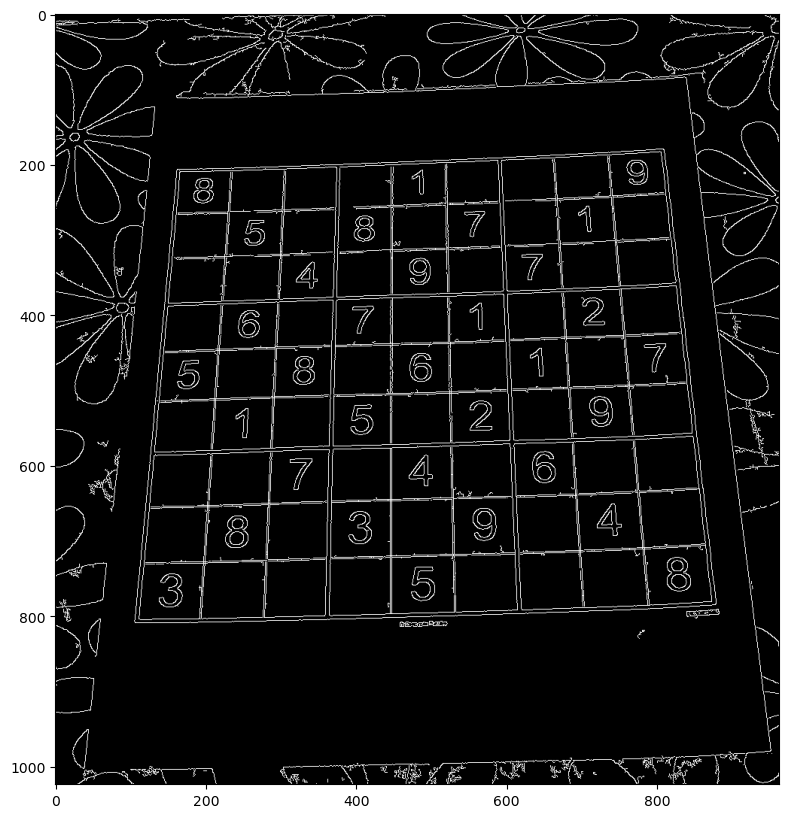

In [37]:
img_canny = cv2.Canny(img_gray, threshold1=25, threshold2=127)
imshow(img_canny)

# Thresholding (segmentation)

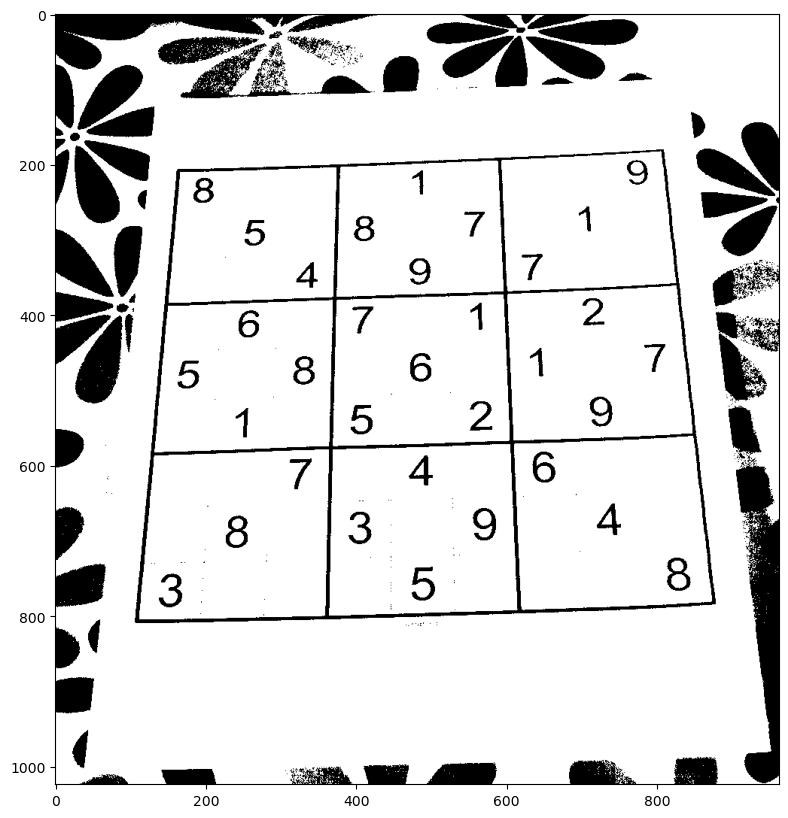

In [39]:
ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
imshow(img_bin)

## method 2: Otsu

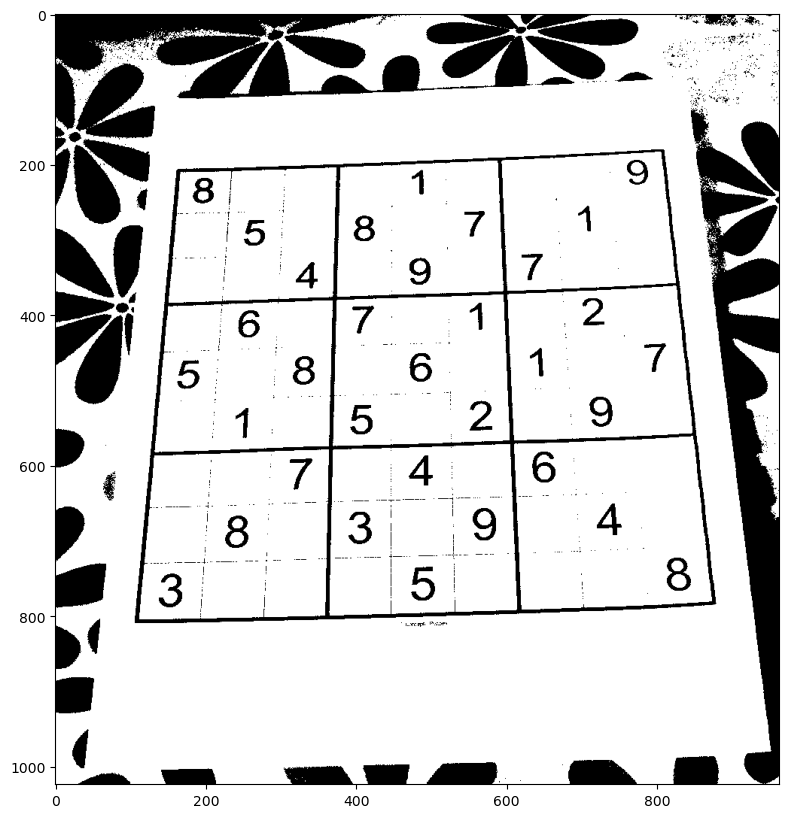

In [32]:
ret, img_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
imshow(img_otsu)

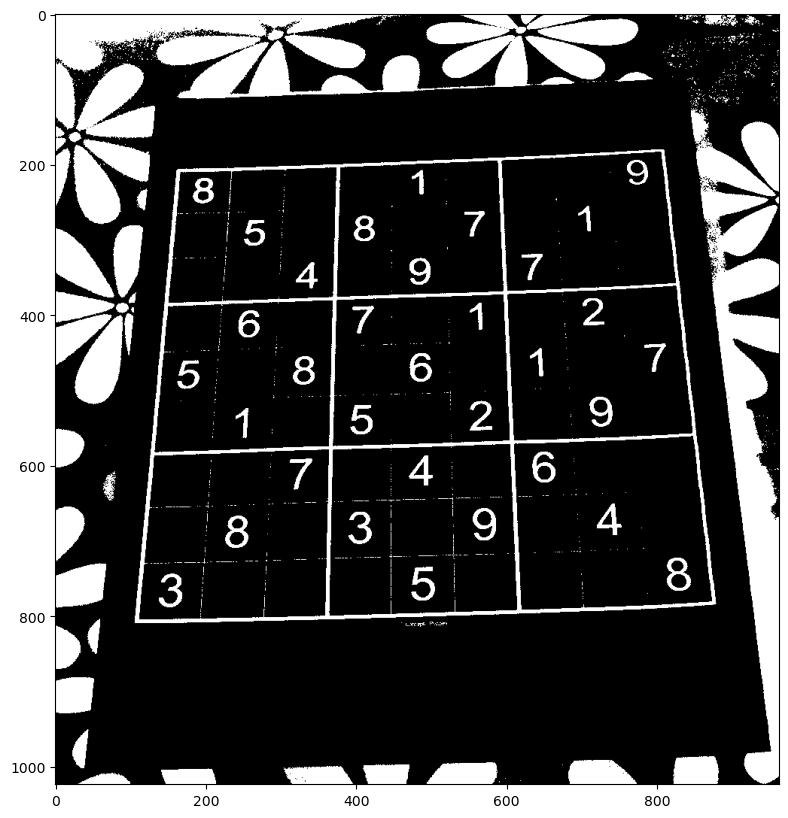

In [33]:
img_invert = 255 - img_otsu
imshow(img_invert)

In [23]:
def imread(img_path):
    img = cv2.imread(img_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def rgb2gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def rgb2bin(img):
    img = rgb2gray(img)
    t, img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)
    return img_bin

def imshow(img, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.show()

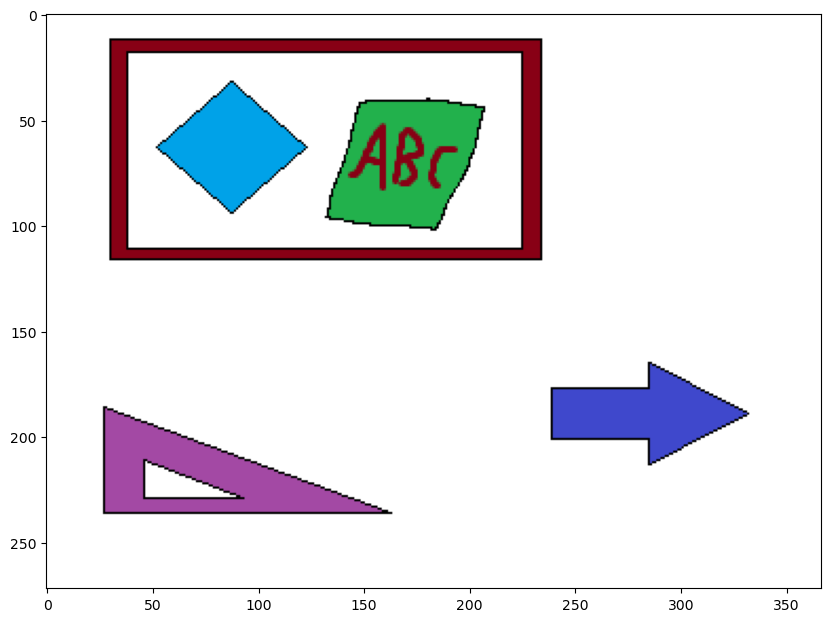

In [24]:
img_shapes = imread('nested-shapes.png')
imshow(img_shapes)

# Find contours
We must convert the image to binary first

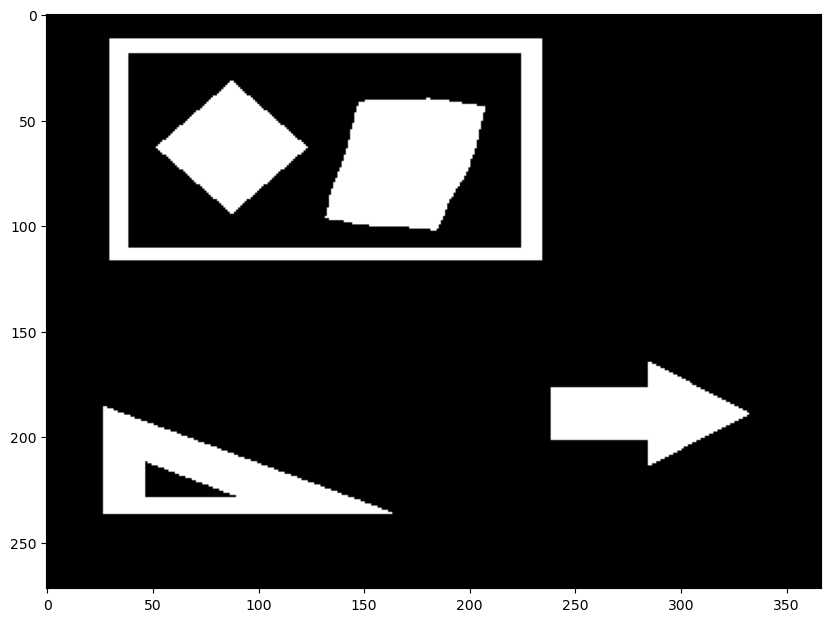

In [25]:
img_shapes_bin = rgb2bin(img_shapes)
imshow(img_shapes_bin)

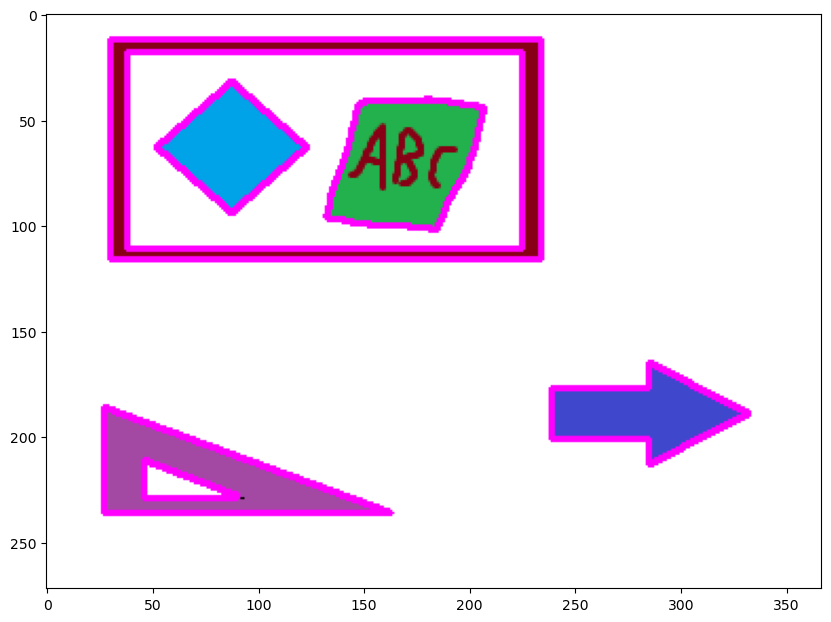

In [48]:
contours, _ = cv2.findContours(img_shapes_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_copy = img_shapes.copy()
cv2.drawContours(img_copy, contours, -1, (255, 0, 255), 2)
imshow(img_copy)

In [49]:
contours[4]

array([[[ 38,  19]],

       [[ 39,  18]],

       [[224,  18]],

       [[225,  19]],

       [[225, 110]],

       [[224, 111]],

       [[ 39, 111]],

       [[ 38, 110]]], dtype=int32)

In [50]:
contours[4].shape

(8, 1, 2)

# Bounding rect

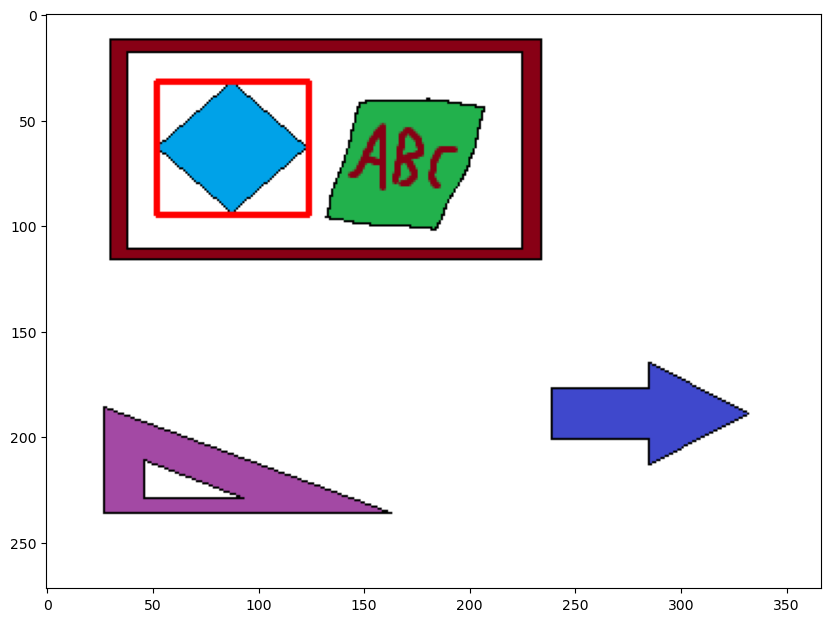

In [56]:
(x, y, w, h) = cv2.boundingRect(contours[6])

img_copy = img_shapes.copy()
cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 0), 2)
imshow(img_copy)